In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import sys
if not('/home/jovyan/pd/demos' in sys.path):
    sys.path.append('/home/jovyan/pd/demos')
import bhc_analysis_functions_merged as bhc
bhc.add_keys('/home/jovyan/pd/demos/credentials.json')


## MRI DATA ANALYSIS - ENIGMA Hippocampal Subfield Pipeline

This demo shows some results after running ENIGMA Hippocampal Subfield pipeline on T1-weighted MRI data of 26 subjects from the open-access project entitled: 

** "UCLA Consortium for Neuropsychiatric Phenomics LA5c Study" **

This pipeline contains the following analysis steps:

#### 1. Segmentation of hippocampal subfields using FreeSurfer: 
This step runs Freesufer for image preprocessing (e.g. Skullstripping, image registration, normalization) and hippocampal subfields segmentation.

In [2]:
list_subjects="/home/jovyan/pd/demos/ENIGMA_Hippocampal_Subfield/list_subjects.txt"
seg_output_dir="/home/jovyan/pd/demos/ENIGMA_Hippocampal_Subfield/hippocampal_segmentation_result"
bhc.run_hippocampal_subfield_segmentation(list_subjects,seg_output_dir)

2020-08-28 20:57:27.821433: Hippocampal subfield segmentation results were already found for 26 subjects.


#### 2. Extraction of hippocampal subfield measures:
From the output files of step 1, this step extracts the size of each hippocampal subfield on left and right hemespheres.

In [3]:

output = bhc.extract_hippocampal_subfield_measures(seg_output_dir, 'hippo_subfields', list_subjects)
bhc.show_all_measures(output)


2020-08-28 20:57:29.234581: Extracting hippocampal subfield measures for input subjects...
2020-08-28 20:57:31.993217: Extraction FINISHED (Total time: 0:00:02.758636).


,SubjID,L_Hippocampal_tail,L_subiculum,L_CA1,L_hippocampal-fissure,L_presubiculum,L_parasubiculum,L_molecular_layer_HP,L_GC-ML-DG,L_CA3,...,R_CA3,R_CA4,R_fimbria,R_HATA,R_Whole_hippocampus,Lhippo,Rhippo,eTIV,Brain,TotalGM
0,subj10171,575.201,410.975,603.534,135.693,313.764,61.3169,547.051,279.532,201.667,...,200.322,238.931,93.8142,57.7265,3310.69,4285.5,3809.2,1602880.0,1207590.0,742370
1,subj10193,634.860,416.865,728.970,195.998,294.112,48.7083,622.597,329.076,238.042,...,256.270,276.465,67.5977,65.9671,3654.39,4444.6,4546.1,1794960.0,1281660.0,668558
2,subj10217,539.756,363.939,523.445,147.226,311.572,58.7127,484.110,252.278,168.209,...,148.436,206.732,79.5118,51.3073,2947.38,3566.2,3487.5,1475050.0,1128170.0,610531
3,subj10227,531.224,455.609,597.084,175.101,371.788,71.8749,547.935,268.132,159.160,...,201.732,252.056,76.0130,46.2021,3403.95,4033.4,4142.9,1391970.0,1015450.0,600200
4,subj10235,577.966,443.365,588.301,151.062,325.367,65.9944,540.001,263.358,170.776,...,195.991,241.195,117.5610,53.1202,3478.06,4061.7,4191.1,1691680.0,1237350.0,716717
5,subj10316,657.276,446.063,674.734,175.330,385.209,82.1004,599.768,288.160,184.759,...,178.126,241.652,90.0810,62.5336,3619.54,4166.7,4221.3,1789670.0,1292790.0,724757
6,subj10325,452.775,401.034,525.525,127.138,324.529,66.1042,497.986,243.428,156.722,...,163.403,220.491,63.1265,49.5263,3234.09,3570.4,3871.4,1213790.0,1007410.0,586027
7,subj10339,451.536,395.351,621.658,133.835,320.471,54.3136,542.854,275.335,199.969,...,203.232,227.655,66.3684,63.1552,3163.05,3683.9,3724.1,1360390.0,991273.0,559214
8,subj10345,546.257,406.977,658.665,159.418,346.711,70.8839,573.036,302.579,200.100,...,219.698,258.132,109.3900,76.6785,3546.60,3989.4,4081.7,1712070.0,1241300.0,724370
9,subj10356,562.457,498.861,639.916,153.079,315.358,54.3021,597.154,287.636,206.079,...,231.064,268.089,59.8062,70.4647,3566.31,3921.9,4074.8,1545460.0,1118630.0,617984


#### 3. Outlier detection:
Given:
lower = mean - 2.698*sd; 
upper = mean + 2.698*sd,
outliers are bigger than upper or smaller than lower


In [4]:
bhc.detect_outlier_hippo_subfields(output)


2020-08-28 20:57:33.376543: Detecting outlier(s) 
Please check the following subjects closely using the QC methods provided in Step 5 of the QA protocols.
Subject subj10707 has VOLUME values too HIGH for the following structures: R_presubiculum

2020-08-28 20:57:33.822462: Outlier detection FINISHED (Total time: 0:00:00.445919).


#### 4. Visuallization by Freeview:

In [5]:
#subjectID='subj10707'
#bhc.freeview_hippo_subSeg(subjectID)


#### 5. Visual QC:
Hippocampal subfields are mapped on T1 background with different colors as QC images using Matlab code. Then the QC images are uploaded to data commons.
Here we download QC images for the detected outlier sub-10707 and visualize these corresponding slices according to given conditions.

2020-08-28 20:57:37.363426: Downloading hippocampal subfield segmentation QC images for sub-10707 subject...
2020-08-28 20:57:59.249441: QC image downloading finished (Total time: 0:00:21.886015).
2020-08-28 20:57:59.250008: Visualizing results


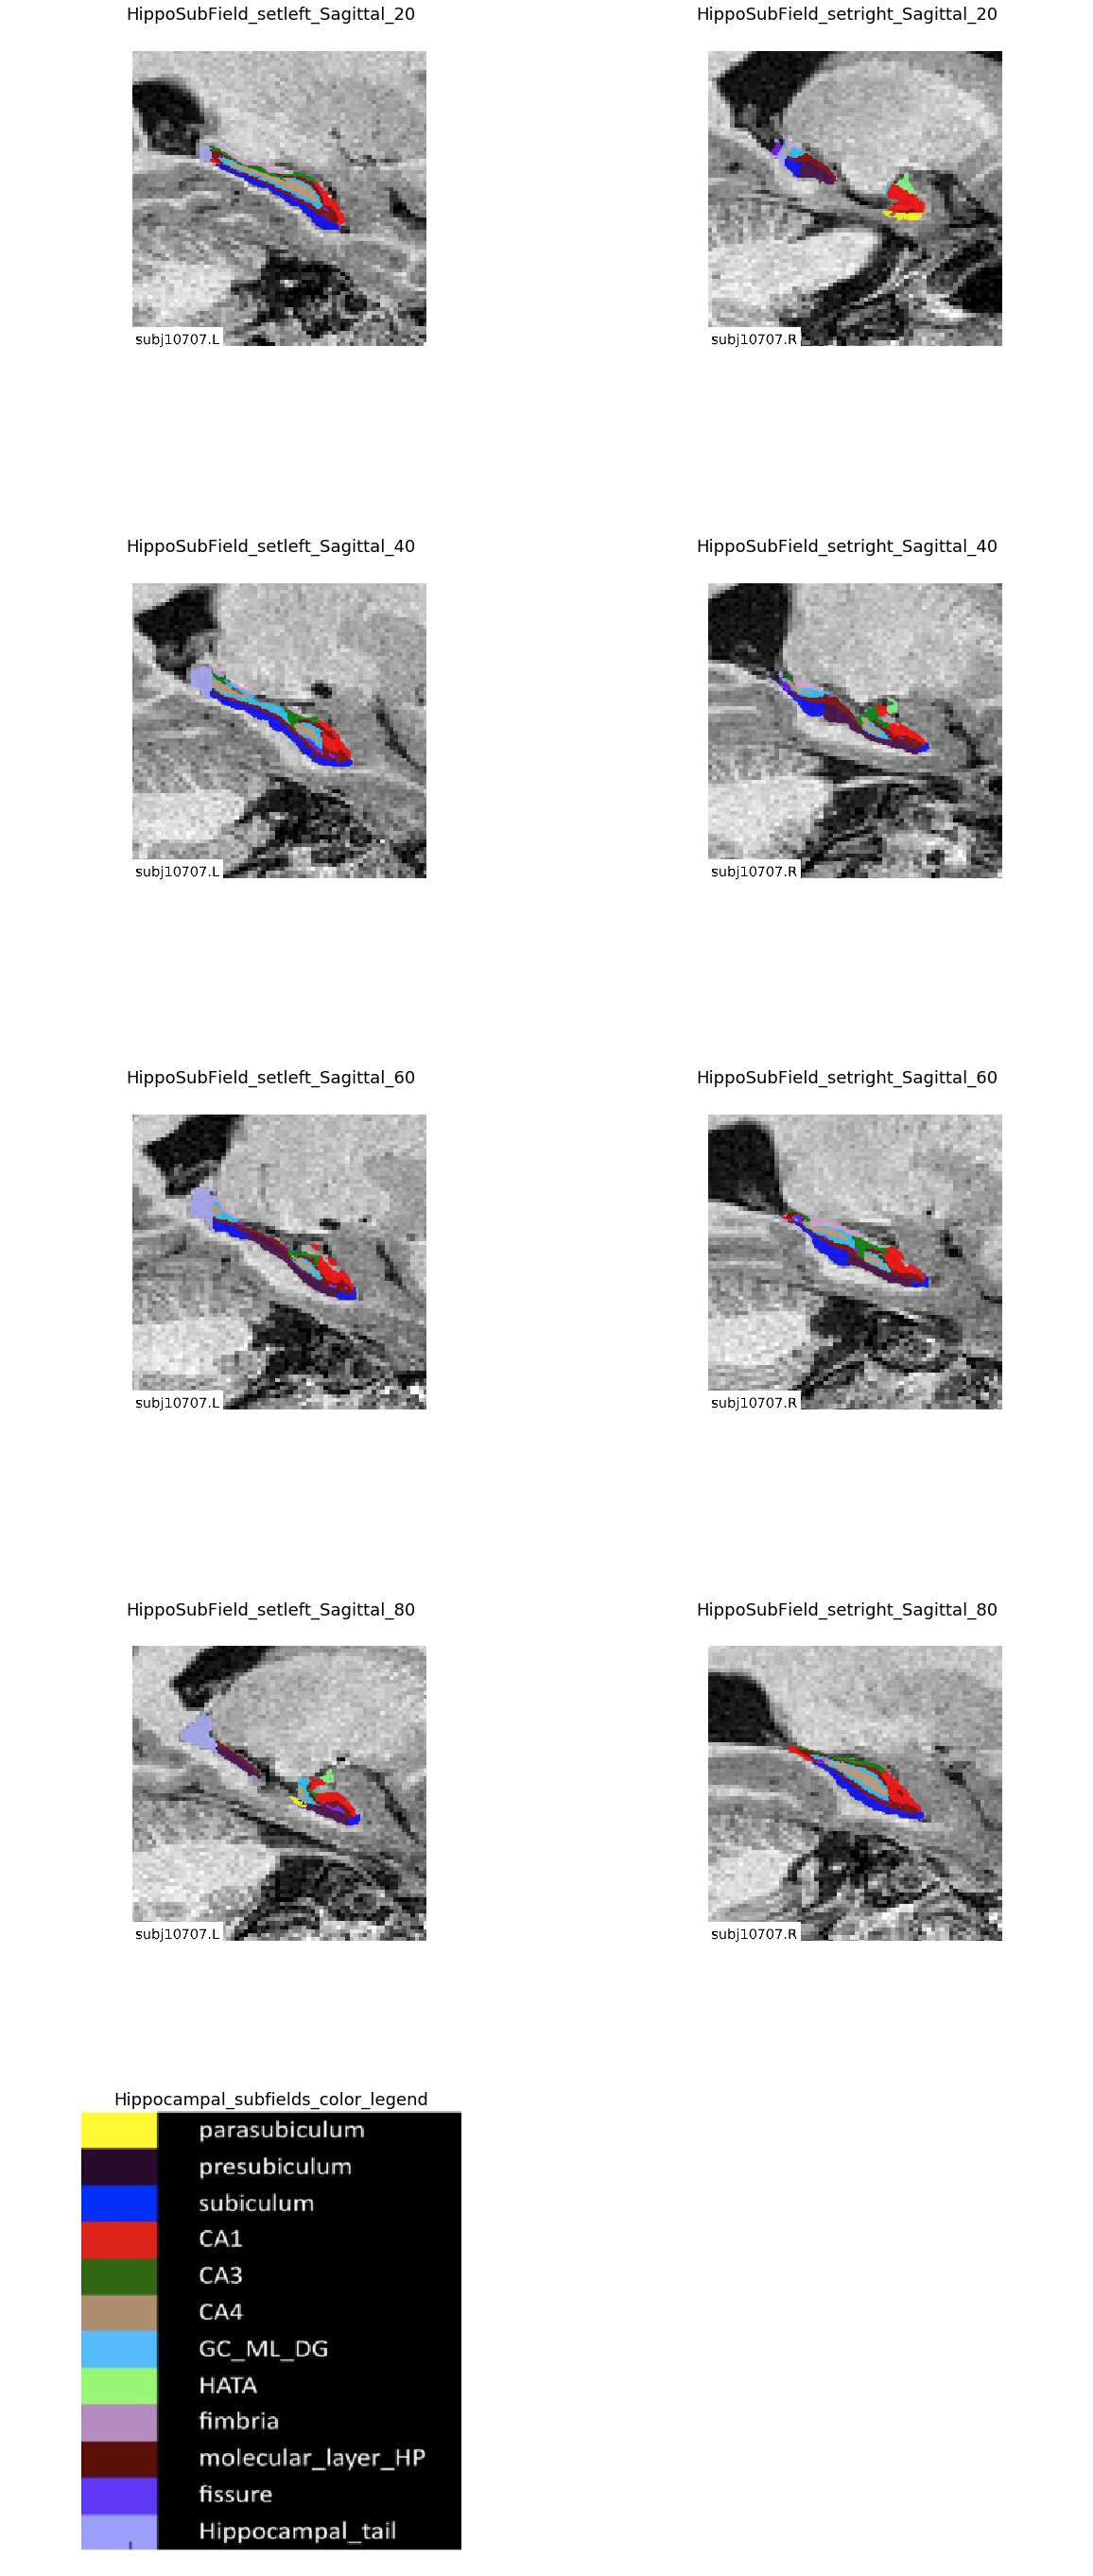

In [6]:
subjectID='sub-10707'
project_id="OpenNeuro-ds000030"
output_dir_QC='/home/jovyan/pd/demos/ENIGMA_Hippocampal_Subfield/hippoSubQC'
fiss_only='no'  #if yes, the fiss will be mapped as one patch, the subfields won't be distinguished.
T1_only='no'    # if yes, the hippocampal subfields segmented by different colors want be mapped on T1 backgroud
view='Sagittal' # There are 3 types of views: Sagittal, Axial, Coronal
bhc.hippo_subfield_segmentationQC(project_id,subjectID,output_dir_QC,fiss_only,T1_only,view)


#### 6. Plot analysis

###### 6.1. Scatter plots on 12 subfields (left vs right)

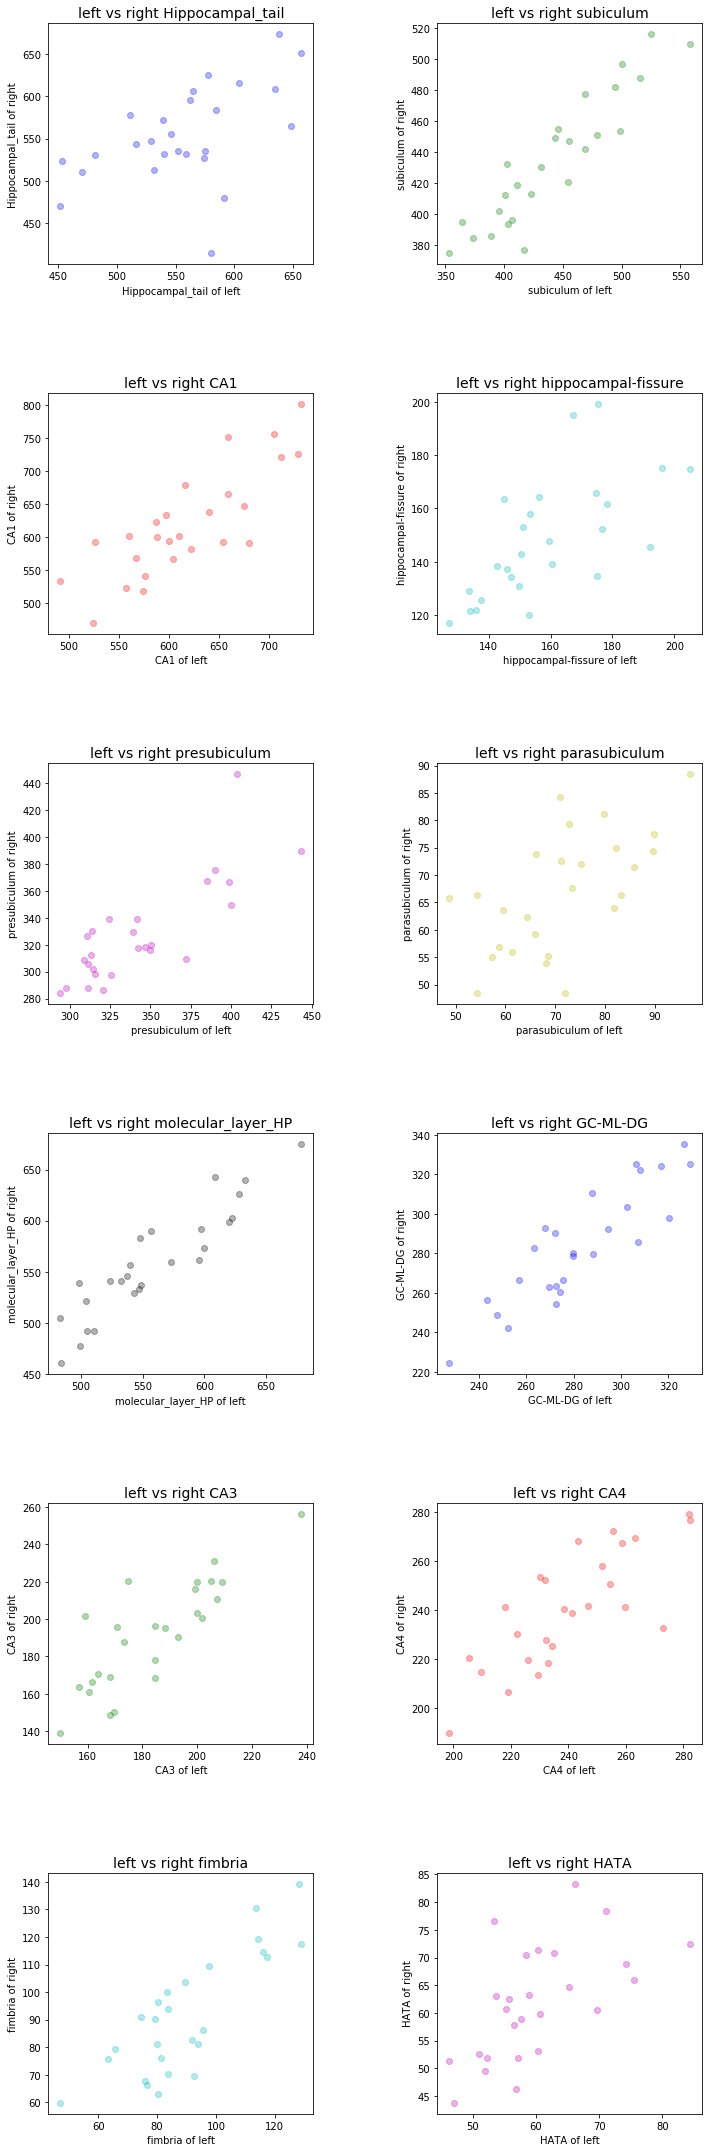

In [7]:
bhc.scatter_all_hipp_subfield_vol(output)


###### 6.2. Analysis on individual subfield 

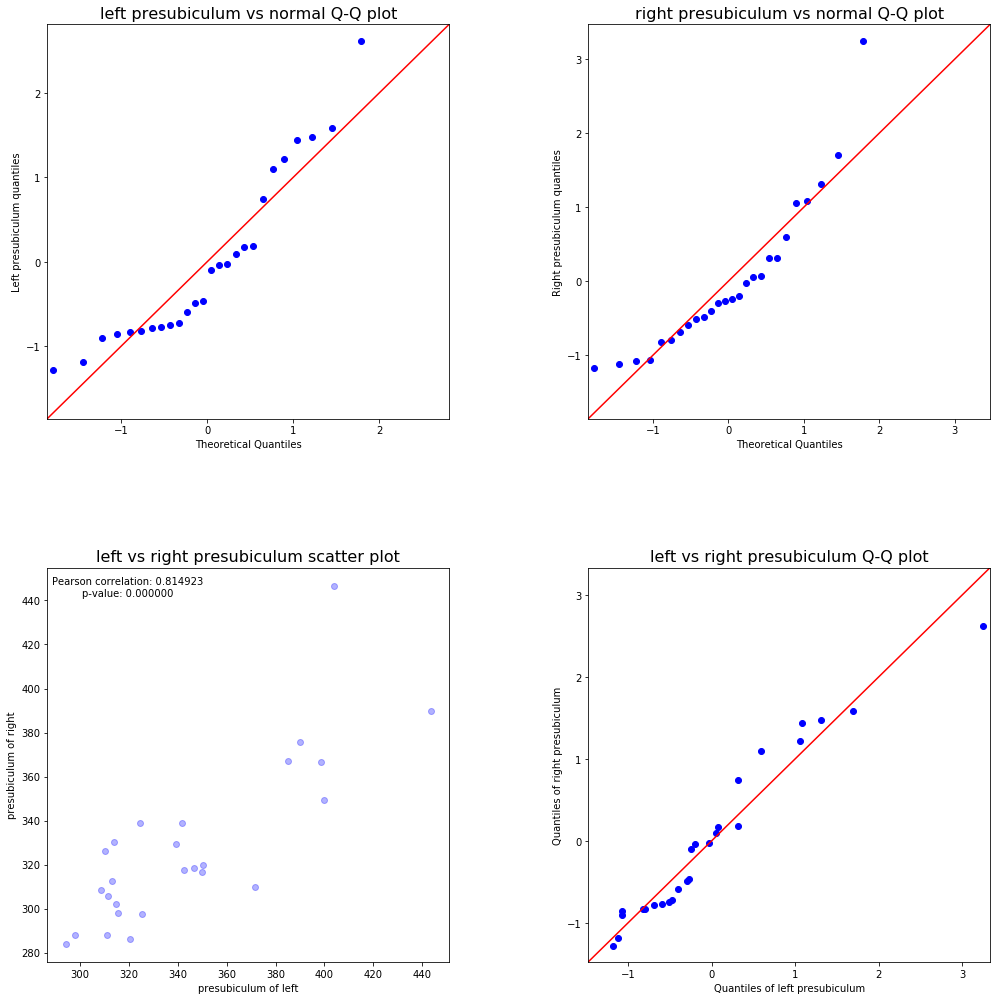

In [8]:
subfield="presubiculum"
bhc.scatter_one_hipp_subfield_corr(output,subfield)
